# The project is divided into the following sections: 
1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Model building and evaluation

# 1. Data Understanding and Exploration

In [103]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [104]:
# Reading the dataset
df = pd.read_csv('train.csv')

In [105]:
# Looking at the first few rows
df.head(5)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [106]:
df.describe().T

count          mean           std    min      25%  \
id                 69999.0  34999.000000  20207.115084    0.0  17499.5   
circle_id          69999.0    109.000000      0.000000  109.0    109.0   
loc_og_t2o_mou     69297.0      0.000000      0.000000    0.0      0.0   
std_og_t2o_mou     69297.0      0.000000      0.000000    0.0      0.0   
loc_ic_t2o_mou     69297.0      0.000000      0.000000    0.0      0.0   
...                    ...           ...           ...    ...      ...   
aon                69999.0   1220.639709    952.426321  180.0    468.0   
aug_vbc_3g         69999.0     68.108597    269.328659    0.0      0.0   
jul_vbc_3g         69999.0     65.935830    267.899034    0.0      0.0   
jun_vbc_3g         69999.0     60.076740    257.226810    0.0      0.0   
churn_probability  69999.0      0.101887      0.302502    0.0      0.0   

                       50%      75%       max  
id                 34999.0  52498.5  69998.00  
circle_id            109.0    109.0    109.00  
loc_og_t2o_mou         0.0      0.0      0.00  
std_og_t2o_mou         0.0      0.0      0.00  
loc_ic_t2o_mou         0.0      0.0      0.00  
...                    ...      ...       ...  
aon                  868.0   1813.0   4337.00  
aug_vbc_3g             0.0      0.0  12916.22  
jul_vbc_3g             0.0      0.0   9165.60  
jun_vbc_3g             0.0      0.0  11166.21  
churn_probability      0.0      0.0      1.00  

[163 rows x 8 columns]

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [108]:
# Summary of the dataset : 69999 rows, 172 columns
df.shape

(69999, 172)

In [109]:
# checking for null values
df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

# 2. Data cleaning

### Treating Null Values

In [110]:
df_null_count = df.isna().sum().reset_index()

In [111]:
df_null_count.columns = ['Variable','Null_Count']

In [112]:
# checking for percentage of null values
df_null_count['Percentage'] = round((df_null_count['Null_Count']/df.shape[0])*100,2)

In [113]:
df_null_count

Variable  Null_Count  Percentage
0                   id           0         0.0
1            circle_id           0         0.0
2       loc_og_t2o_mou         702         1.0
3       std_og_t2o_mou         702         1.0
4       loc_ic_t2o_mou         702         1.0
..                 ...         ...         ...
167                aon           0         0.0
168         aug_vbc_3g           0         0.0
169         jul_vbc_3g           0         0.0
170         jun_vbc_3g           0         0.0
171  churn_probability           0         0.0

[172 rows x 3 columns]

In [114]:
# checking for percentage of null values greater than 75
df_null_count[df_null_count['Percentage']>=75]

Empty DataFrame
Columns: [Variable, Null_Count, Percentage]
Index: []

In [115]:
null_75 = df_null_count[(df_null_count['Percentage']>=50) & (df_null_count['Percentage']<75)]

In [116]:
null_75

Variable  Null_Count  Percentage
119  date_of_last_rech_data_6       52431       74.90
120  date_of_last_rech_data_7       52134       74.48
121  date_of_last_rech_data_8       51582       73.69
122         total_rech_data_6       52431       74.90
123         total_rech_data_7       52134       74.48
124         total_rech_data_8       51582       73.69
125           max_rech_data_6       52431       74.90
126           max_rech_data_7       52134       74.48
127           max_rech_data_8       51582       73.69
128           count_rech_2g_6       52431       74.90
129           count_rech_2g_7       52134       74.48
130           count_rech_2g_8       51582       73.69
131           count_rech_3g_6       52431       74.90
132           count_rech_3g_7       52134       74.48
133           count_rech_3g_8       51582       73.69
134        av_rech_amt_data_6       52431       74.90
135        av_rech_amt_data_7       52134       74.48
136        av_rech_amt_data_8       51582       73.69
143                 arpu_3g_6       52431       74.90
144                 arpu_3g_7       52134       74.48
145                 arpu_3g_8       51582       73.69
146                 arpu_2g_6       52431       74.90
147                 arpu_2g_7       52134       74.48
148                 arpu_2g_8       51582       73.69
149          night_pck_user_6       52431       74.90
150          night_pck_user_7       52134       74.48
151          night_pck_user_8       51582       73.69
164                 fb_user_6       52431       74.90
165                 fb_user_7       52134       74.48
166                 fb_user_8       51582       73.69

In [117]:
# Dropping null values greater than 75 percentage
df.drop(null_75['Variable'],axis = 1,inplace = True)

In [119]:
drop_cols = ['id','circle_id']

In [120]:
# dropping unnecessary variables
df.drop(drop_cols,axis = 1,inplace = True)

In [121]:
num_cols = list(df.select_dtypes(include= ['int','float']).columns)

In [122]:
cat_cols = list(df.select_dtypes(include = ['object']).columns)

In [123]:
# Fill missing values in numerical columns with mean
for col in num_cols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

In [124]:
# Fill missing values in categorical columns with mode
for col in cat_cols:
    mode_val = df[col].mode()
    df[col].fillna(mean_val, inplace=True)

## Bivariate Analysis & Multivariate Analysis

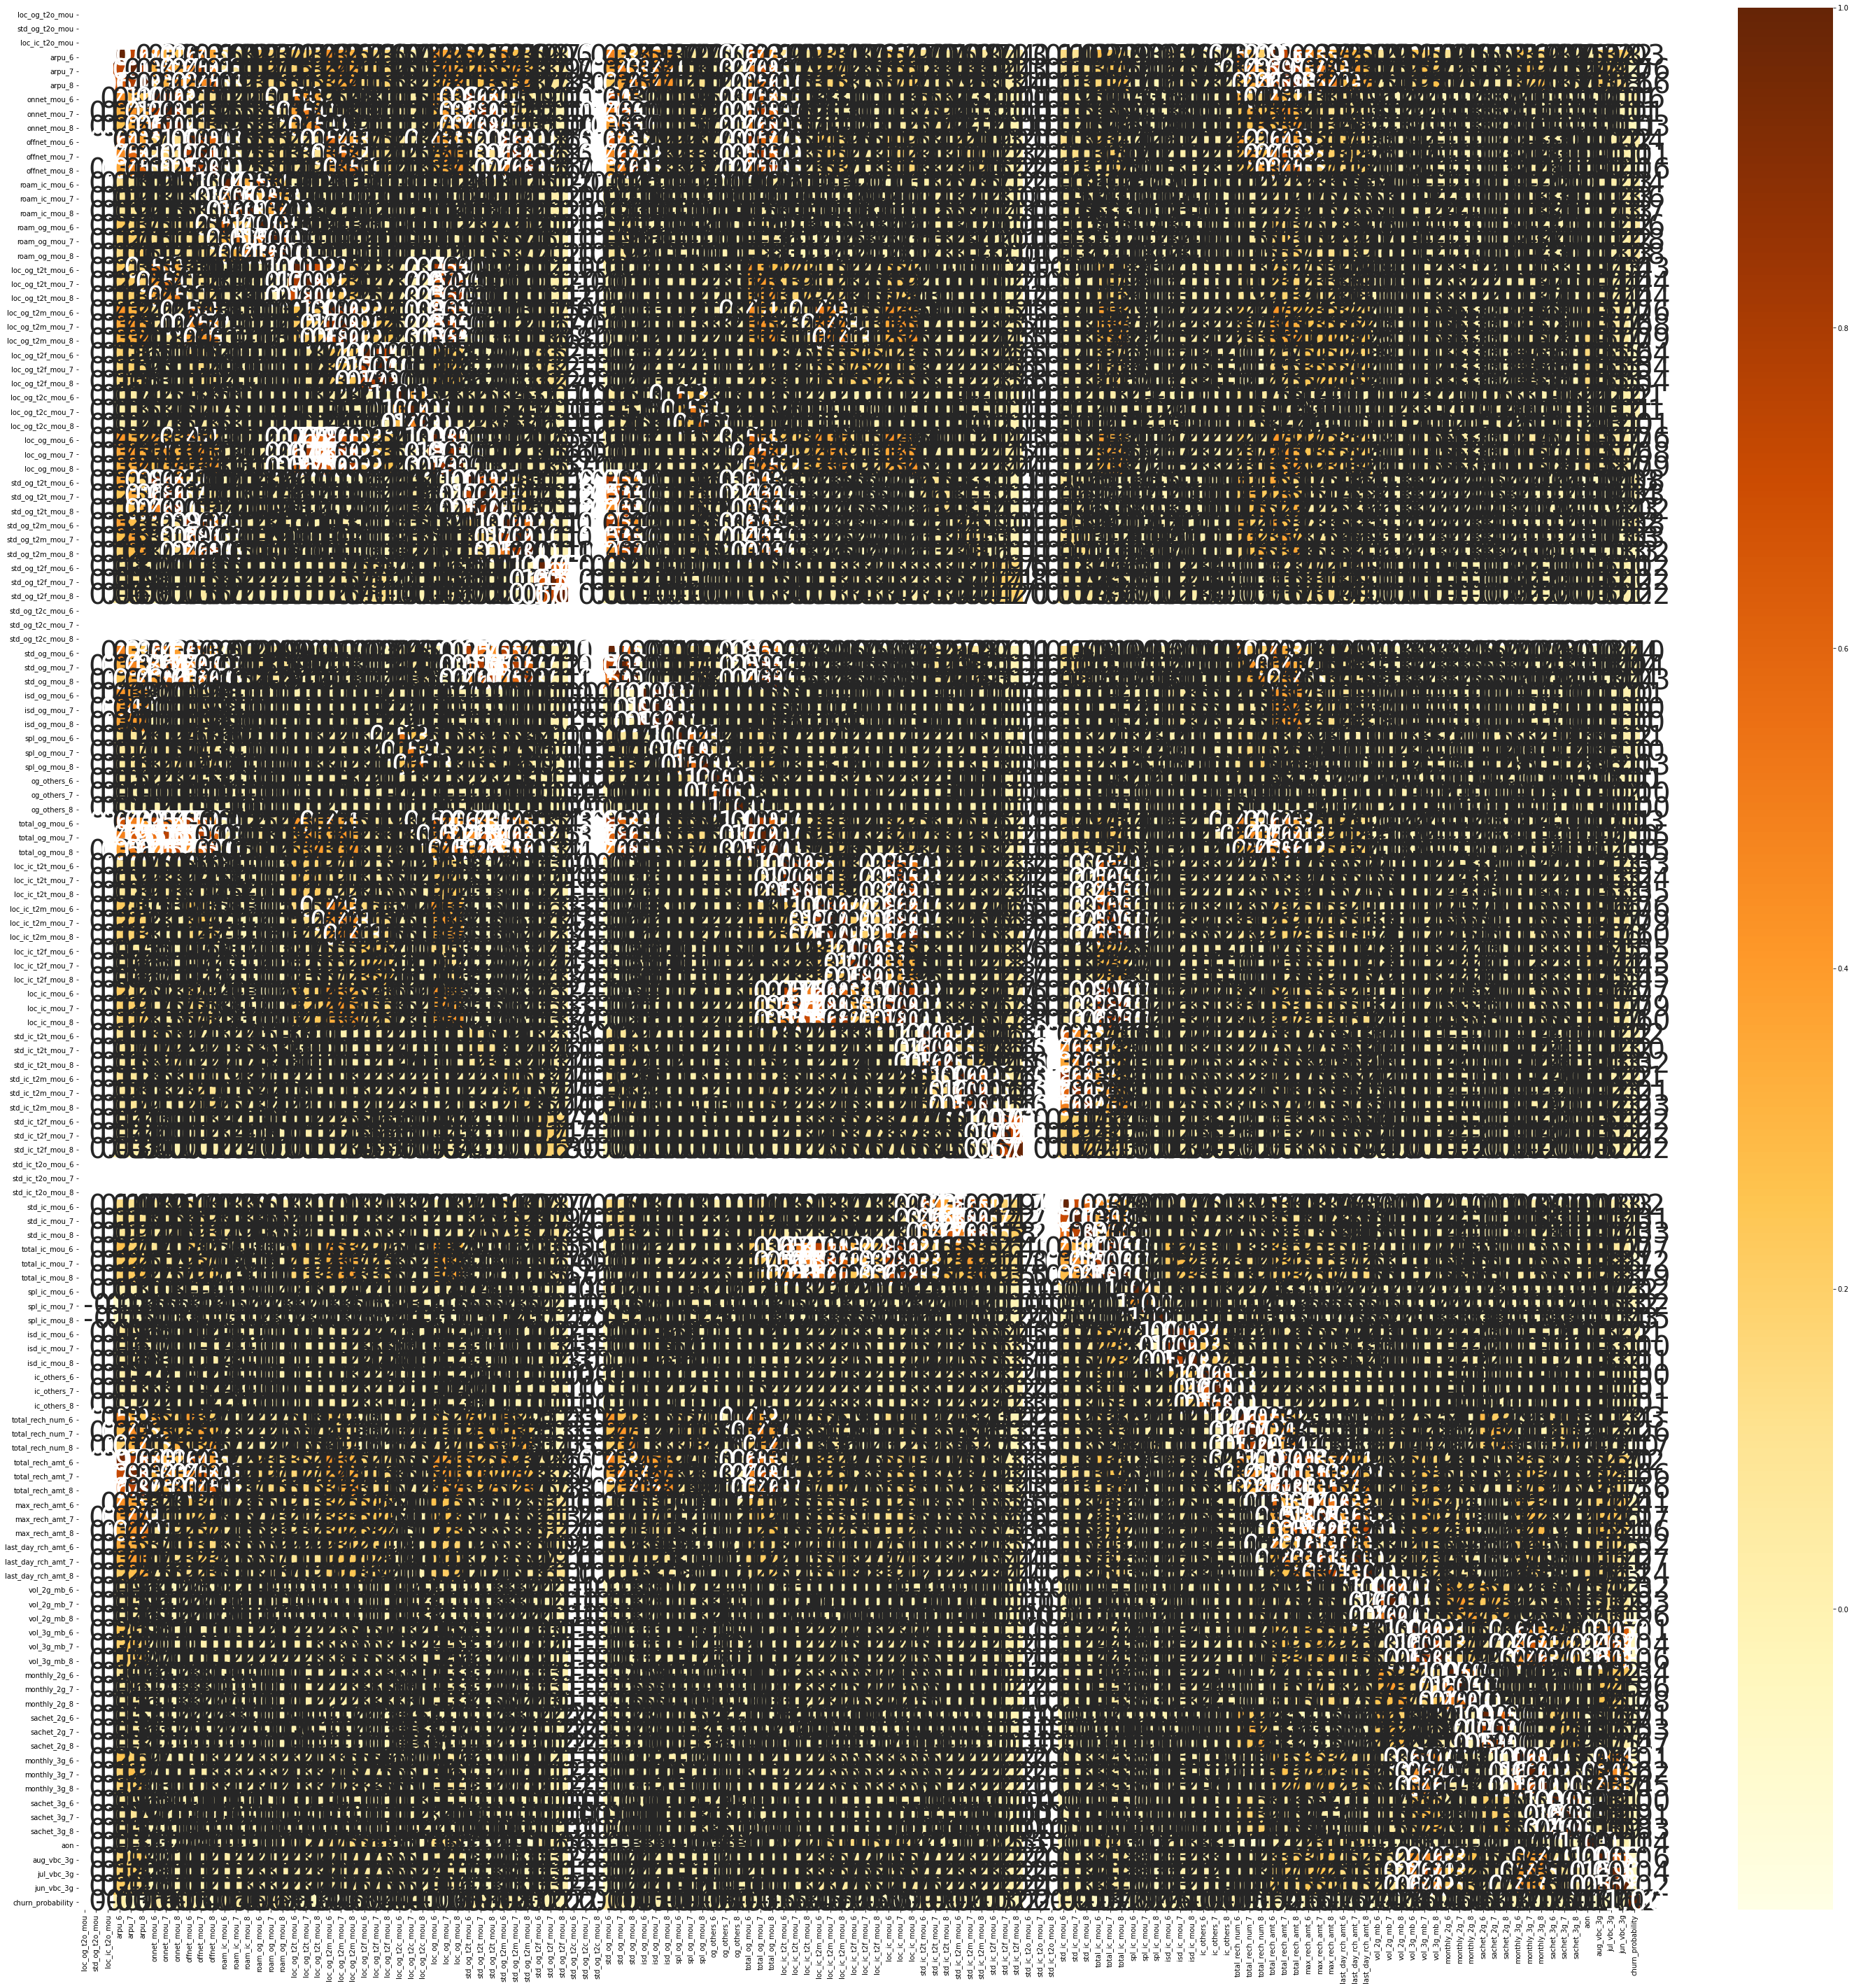

In [88]:
# plotting the heatmap to check for multicollinearity
plt.figure(figsize=(50, 50))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap="YlOrBr", annot_kws={"size": 40})
plt.show()

- In our project, the dataset contains 139 columns, making it challenging to derive meaningful insights from visualizations such as heatmaps due to the overwhelming amount of data. 
- To address this issue, we will employ Principal Component Analysis (PCA) as a preprocessing technique. PCA allows us to reduce the dimensionality of the dataset by transforming the original features into a smaller set of orthogonal components while preserving as much variance as possible. 
- By condensing the dataset in this manner, we can retain the most important patterns and relationships within the data while significantly reducing its complexity. This enables us to create visualizations, such as heatmaps, that are more interpretable and insightful, facilitating a clearer understanding of the underlying structure of the data and aiding in the identification of meaningful patterns and trends relevant to our project on churn prediction in the telecom industry.

# 3. Data Preparation

In [67]:
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=cat_cols,drop_first=True,dtype = 'int')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 228 entries, loc_og_t2o_mou to date_of_last_rech_8_8/9/2014
dtypes: float64(108), int32(94), int64(26)
memory usage: 96.7 MB


In [69]:
for i in df.columns:
    df[i]= df[i].astype('float')

In [26]:
# Scale the features using MinMaxScaler
df_scaled =df.copy()
from sklearn.preprocessing import MinMaxScaler
##df_scaled = df.apply(zscore)


scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df[df.columns])

In [27]:
# Making a function to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
# Converting all the values greater than Inter Quantile Range to the Upper Limit and values lower than IQR to Lower Limit 
for column in num_cols:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [128]:
X = df.drop('churn_probability',axis=1)
y = df['churn_probability'] # target variable

In [129]:
X

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6  \
0                 0.0             0.0             0.0            6/30/2014   
1                 0.0             0.0             0.0            6/30/2014   
2                 0.0             0.0             0.0            6/30/2014   
3                 0.0             0.0             0.0            6/30/2014   
4                 0.0             0.0             0.0            6/30/2014   
...               ...             ...             ...                  ...   
69994             0.0             0.0             0.0            6/30/2014   
69995             0.0             0.0             0.0            6/30/2014   
69996             0.0             0.0             0.0            6/30/2014   
69997             0.0             0.0             0.0            6/30/2014   
69998             0.0             0.0             0.0            6/30/2014   

      last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  \
0                7/31/2014            8/31/2014   31.277   87.009    7.527   
1                7/31/2014            8/31/2014    0.000  122.787   42.953   
2                7/31/2014            8/31/2014   60.806  103.176    0.000   
3                7/31/2014            8/31/2014  156.362  205.260  111.095   
4                7/31/2014            8/31/2014  240.708  128.191  101.565   
...                    ...                  ...      ...      ...      ...   
69994            7/31/2014            8/31/2014   15.760  410.924  329.136   
69995            7/31/2014            8/31/2014  160.083  289.129  265.772   
69996            7/31/2014            8/31/2014  372.088  258.374  279.782   
69997            7/31/2014            8/31/2014  238.575  245.414  145.062   
69998            7/31/2014            8/31/2014  168.269   42.815  167.961   

       onnet_mou_6  ...  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
0            48.58  ...             0             0             0   
1             0.00  ...             0             1             0   
2             0.53  ...             0             0             0   
3             7.26  ...             0             0             0   
4            21.28  ...             0             0             0   
...            ...  ...           ...           ...           ...   
69994         0.00  ...             0             0             0   
69995       116.54  ...             0             0             0   
69996        77.13  ...             0             0             0   
69997        14.01  ...             1             1             1   
69998         0.00  ...             0             0             0   

       sachet_3g_6  sachet_3g_7  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  \
0                0            0            0  1958        0.00        0.00   
1                0            0            0   710        0.00        0.00   
2                0            0            0   882        0.00        0.00   
3                0            0            0   982        0.00        0.00   
4                0            1            0   647        0.00        0.00   
...            ...          ...          ...   ...         ...         ...   
69994            0            1            0   221        0.00        0.00   
69995            0            0            0   712        0.00        0.00   
69996            0            0            0   879        0.00        0.00   
69997            0            0            0   277      664.25     1402.96   
69998            0            0            0  1876        0.00        0.00   

       jun_vbc_3g  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00  
...           ...  
69994        0.00  
69995        0.00  
69996        0.00  
69997      990.97  
69998        0.00  

[69999 rows x 139 columns]

In [130]:
# Splitting the data into training and testing data in the ratio of 80:20 respectively 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

### Principal Component Analysis

In [33]:
from sklearn.decomposition import PCA

# Calculate the covariance matrix
covariance_matrix = np.cov(X_train, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Initialize PCA
pca_final = PCA(n_components=0.9)


# Transform the data to its principal components
X_train_pca = pca_final.fit_transform(X_train)

# Create a new dataframe for the principal components
pca_df = pd.DataFrame(data=X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# Print explained variance ratio
print("\nExplained Variance Ratio:")
print(pca_final.explained_variance_ratio_)




# Original number of features
original_num_features = X_train.shape[1]

# Reduced number of features after PCA
reduced_num_features = X_train_pca.shape[1]

# Print the dimensions before and after PCA
print("Original dimensions:", original_num_features)
print("Reduced dimensions:", reduced_num_features)
print("Dimensionality Reduced by:", round((1-(reduced_num_features/original_num_features))*100,2))

Eigenvalues:
[1.86031278e-01 1.52298171e-01 1.40818125e-01 1.27411794e-01
 1.14924757e-01 1.08307629e-01 1.06746187e-01 9.82235539e-02
 9.57869253e-02 8.87466554e-02 8.38868723e-02 8.05044772e-02
 7.80383339e-02 7.37267813e-02 6.45259477e-02 6.12309162e-02
 5.65722118e-02 5.40195710e-02 5.15448046e-02 4.67444549e-02
 4.30378774e-02 4.11759889e-02 3.96597812e-02 3.81757088e-02
 3.48703165e-02 3.18172008e-02 2.99421111e-02 2.93338581e-02
 2.89315022e-02 2.85247719e-02 2.74556532e-02 2.56901462e-02
 2.49431245e-02 2.39941954e-02 2.30777729e-02 2.17071986e-02
 2.03570564e-02 1.96977944e-02 1.85383127e-02 1.83745529e-02
 1.76055773e-02 1.65480669e-02 1.58370641e-02 1.49611949e-02
 1.38826337e-02 1.28192934e-02 1.18857929e-02 1.15211027e-02
 1.03723742e-02 9.65865131e-03 8.99072171e-03 8.95267519e-03
 8.86783343e-03 8.34812791e-03 8.13014675e-03 7.97807693e-03
 7.50544926e-03 7.18752822e-03 7.09254146e-03 7.03842213e-03
 6.91759829e-03 6.19174802e-03 6.08066872e-03 5.67153448e-03
 5.60465977

In [34]:
X_test_pca=pca_final.transform(X_test)
X_test_pca.shape

(14000, 43)

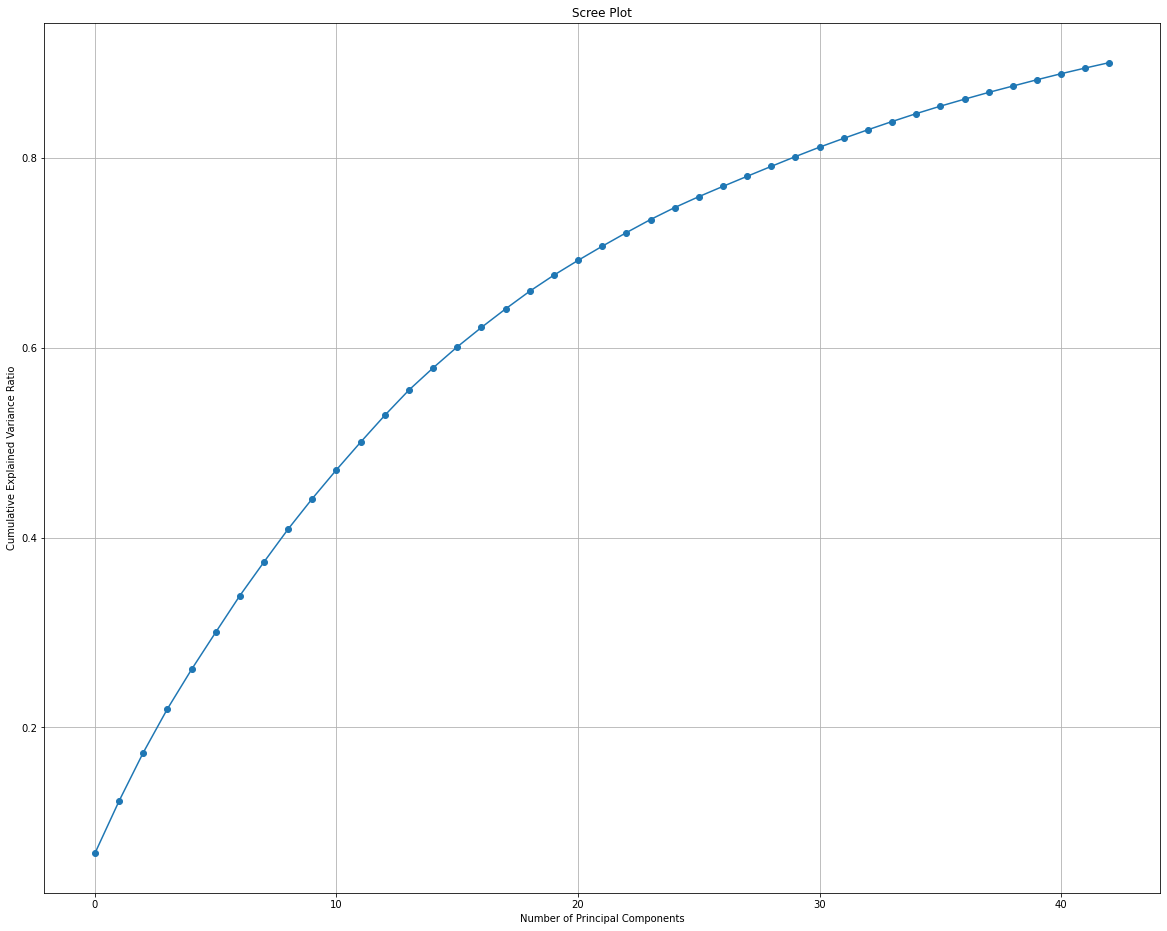

In [35]:
# Plotting Scree Plot
plt.figure(figsize=(20, 16))
plt.plot(np.cumsum(pca_final.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# 4. Model Building and Evaluation with PCA

### Logistic Regression

In [131]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [132]:
Before_Recall_score_pca=[]
After_Recall_score_pca=[]

In [133]:
ytest_predict = model.predict(X_test_pca)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,precision_recall_fscore_support

print("Confusion Matrix:\n",confusion_matrix(y_test, ytest_predict))

report1=classification_report(y_test,ytest_predict)

# Use precision_recall_fscore_support to get recall scores for all classes
precision1, recall1, fscore1, support1 = precision_recall_fscore_support(y_test, ytest_predict)

# Access recall score for the desired class (e.g., class 1)
Before_Recall_score_pca.append(round(recall1[1],2))  # Adjust index based on the desired class


# Predicting the probabilities for test set
y_prob = model.predict_proba(X_test_pca)[:, 1]

# Creating a new dataframe for predicted probabilities of test set.
pred_prob_test = pd.DataFrame(y_prob)
pred_prob_test.columns = ['one']

# Changing the cut-off point to 0.3 so as to increase the recall score
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']>=0.3,1)
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']<0.3,0)

report2=classification_report(y_test,pred_prob_test['one'])


# Use precision_recall_fscore_support to get recall scores for all classes
precision2, recall2, fscore2, support2 = precision_recall_fscore_support(y_test, pred_prob_test['one'])

# Access recall score for the desired class (e.g., class 1)
After_Recall_score_pca.append(round(recall2[1],2))  # Adjust index based on the desired class


print("\nInitial Classification Report:\n",report1)
print("\nFinal Classification Report(After changing Cut-off point):\n",report2)
print("Initial Recall Score:",round(recall1[1],2))
print("Final Recall Score:",round(recall2[1],2))



Confusion Matrix:
 [[12490    82]
 [ 1349    79]]

Initial Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95     12572
           1       0.49      0.06      0.10      1428

    accuracy                           0.90     14000
   macro avg       0.70      0.52      0.52     14000
weighted avg       0.86      0.90      0.86     14000


Final Classification Report(After changing Cut-off point):
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     12572
           1       0.40      0.17      0.24      1428

    accuracy                           0.89     14000
   macro avg       0.66      0.57      0.59     14000
weighted avg       0.86      0.89      0.87     14000

Initial Recall Score: 0.06
Final Recall Score: 0.17


### Inferences from Logistic Regression:
1. **Importance of Recall**: In the context of churn prediction, recall is particularly crucial because the primary goal is to identify as many churners as possible to intervene and retain them. A low recall means that the model fails to flag many customers who are likely to churn, leading to missed opportunities for retention strategies.

2. **Initial Recall Score**: The model initially demonstrated a very low recall score of 0.06 for predicting churn (class 1). This indicates that it was ineffective at identifying customers who are actually at high risk of churning. A low recall means that the model missed a significant number of churners, which could lead to missed opportunities for retention efforts.

3. **Improvement in Recall**: After adjusting the cutoff point, the recall score improved to 0.17. While this is an enhancement compared to the initial performance, it remains relatively low. The increase in recall suggests that the model is now capturing more churners, but there is still room for improvement.

4. **Precision-Recall Trade-off**: The increase in recall came at the expense of precision, which decreased from 0.49 to 0.40. This trade-off indicates that the model's ability to correctly identify churners has improved, but it may also classify more non-churners as churners (higher false positive rate).

5. **Data Imbalance Impact**: The confusion matrix reveals a class imbalance, with a majority of samples belonging to the non-churn class. This imbalance can affect the model's ability to learn patterns associated with the minority class (churners) and may contribute to the initial low recall score.

6. **Potential for Further Improvement**: While there has been some improvement in recall, there is still scope for further enhancement. Exploring alternative modeling approaches could potentially lead to better recall performance.

In conclusion, while the logistic regression model's recall has improved after adjusting the cutoff point, it remains relatively low for effective churn prediction. Enhancing recall further should be a priority to ensure that the model accurately identifies customers at high risk of churning, enabling proactive retention strategies.

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize Random Forest classifier with the best hyperparameters
best_rf_clf = RandomForestClassifier(**best_params)

# Fit the Random Forest classifier with the best hyperparameters to the training data
best_rf_clf.fit(X_train_pca, y_train)

# Evaluate the model
train_accuracy = best_rf_clf.score(X_train_pca, y_train)
test_accuracy = best_rf_clf.score(X_test_pca, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Training Accuracy: 0.971160199289273
Test Accuracy: 0.9016428571428572


In [40]:
# Predicting target variable on the basis of best fit model
ytest_predict = best_rf_clf.predict(X_test_pca)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,precision_recall_fscore_support
print("Confusion Matrix:\n",confusion_matrix(y_test, ytest_predict))

report1=classification_report(y_test,ytest_predict)

# Use precision_recall_fscore_support to get recall scores for all classes
precision1, recall1, fscore1, support1 = precision_recall_fscore_support(y_test, ytest_predict)

# Access recall score for the desired class (e.g., class 1)
Before_Recall_score_pca.append(round(recall1[1],2))  # Adjust index based on the desired class


# Predicting the probabilities for test set
y_prob = best_rf_clf.predict_proba(X_test_pca)[:, 1]

# Creating a new dataframe for predicted probabilities of test set.
pred_prob_test = pd.DataFrame(y_prob)
pred_prob_test.columns = ['one']

# Changing the cut-off point to 0.3 so as to increase the recall score
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']>=0.3,1)
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']<0.3,0)

report2=classification_report(y_test,pred_prob_test['one'])


# Use precision_recall_fscore_support to get recall scores for all classes
precision2, recall2, fscore2, support2 = precision_recall_fscore_support(y_test, pred_prob_test['one'])

# Access recall score for the desired class (e.g., class 1)
After_Recall_score_pca.append(round(recall2[1],2))  # Adjust index based on the desired class


print("\nInitial Classification Report:\n",report1)
print("\nFinal Classification Report(After changing Cut-off point):\n",report2)
print("Initial Recall Score:",round(recall1[1],2))
print("Final Recall Score:",round(recall2[1],2))

Confusion Matrix:
 [[12376   196]
 [ 1181   247]]

Initial Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     12572
           1       0.56      0.17      0.26      1428

    accuracy                           0.90     14000
   macro avg       0.74      0.58      0.61     14000
weighted avg       0.88      0.90      0.88     14000


Final Classification Report(After changing Cut-off point):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     12572
           1       0.35      0.31      0.33      1428

    accuracy                           0.87     14000
   macro avg       0.64      0.62      0.63     14000
weighted avg       0.86      0.87      0.87     14000

Initial Recall Score: 0.17
Final Recall Score: 0.31


### Inferences from Random Forest Classifier:
1. **Recall Enhancement**:The primary aim of model refinement was to bolster recall, emphasizing the importance of capturing as many churn cases as possible. Initially, the model's recall for predicting churn stood at a modest 0.17. However, after strategic adjustments to the cutoff point, the recall surged to 0.31 in the final report. This substantial improvement indicates that the model is now significantly better at identifying customers who are at risk of churning, crucial for proactive retention measures.

2. **Further Optimization**: While the recall has seen a commendable boost, there remains a scope to fine-tune the model to strike a better balance between recall and precision. Mitigating the false positive rate is imperative to ensure resource efficiency and prevent unnecessary expenditures on customers unlikely to churn. Continued model refinement efforts, possibly through iterative adjustments or alternative algorithm exploration, are warranted to optimize performance without compromising recall.

In conclusion, while the recall for churn prediction in this model has shown improvement compared to previous iterations such as logistic regression, it remains relatively low. This suggests that the model may still miss a significant portion of churn cases. Therefore, it's imperative to explore alternative models or advanced techniques to further boost recall. By experimenting with different algorithms or ensemble methods and fine-tuning model parameters, we can aim to achieve a higher recall rate, ensuring more comprehensive identification of customers at risk of churn.

### XGBoost

In [41]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score

# Defining XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Defining parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50,200],
    'learning_rate': [0.05,0.07,0.1],
    'max_depth': [5,7,10,12],
    'gamma': [0.05,0.07,0.03],
    'reg_lambda': [0.5,1,1.5],
    'min_child_weight': [2,5,7]
}

# Define RandomizedSearchCV with XGBoost model and parameter distribution
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, cv=5, scoring='recall', n_iter=100, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_pca, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)



Best Parameters: {'reg_lambda': 1.5, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.03}
Best Score: 0.2033622399557175
Test Accuracy: 0.8979285714285714


In [42]:
# Predicting target variable on the basis of best fit model
ytest_predict = best_model.predict(X_test_pca)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,precision_recall_fscore_support
print("Confusion Matrix:\n",confusion_matrix(y_test, ytest_predict))

report1=classification_report(y_test,ytest_predict)

# Use precision_recall_fscore_support to get recall scores for all classes
precision1, recall1, fscore1, support1 = precision_recall_fscore_support(y_test, ytest_predict)

# Access recall score for the desired class (e.g., class 1)
Before_Recall_score_pca.append(round(recall1[1],2))  # Adjust index based on the desired class


# Predicting the probabilities for test set
y_prob = best_model.predict_proba(X_test_pca)[:, 1]

# Creating a new dataframe for predicted probabilities of test set.
pred_prob_test = pd.DataFrame(y_prob)
pred_prob_test.columns = ['one']

# Changing the cut-off point to 0.3 so as to increase the recall score
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']>=0.3,1)
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']<0.3,0)

report2=classification_report(y_test,pred_prob_test['one'])


# Use precision_recall_fscore_support to get recall scores for all classes
precision2, recall2, fscore2, support2 = precision_recall_fscore_support(y_test, pred_prob_test['one'])

# Access recall score for the desired class (e.g., class 1)
After_Recall_score_pca.append(round(recall2[1],2))  # Adjust index based on the desired class


print("\nInitial Classification Report:\n",report1)
print("\nFinal Classification Report(After changing Cut-off point):\n",report2)
print("Initial Recall Score:",round(recall1[1],2))
print("Final Recall Score:",round(recall2[1],2))


Confusion Matrix:
 [[12305   267]
 [ 1162   266]]

Initial Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     12572
           1       0.50      0.19      0.27      1428

    accuracy                           0.90     14000
   macro avg       0.71      0.58      0.61     14000
weighted avg       0.87      0.90      0.88     14000


Final Classification Report(After changing Cut-off point):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     12572
           1       0.37      0.29      0.33      1428

    accuracy                           0.88     14000
   macro avg       0.65      0.62      0.63     14000
weighted avg       0.87      0.88      0.87     14000

Initial Recall Score: 0.19
Final Recall Score: 0.29


### Inferences from XGBoost:
1. **Recall Enhancement**:
   - The initial recall for churn prediction with XGBoost was 0.19, which increased to 0.29 after adjusting the cutoff point. This indicates a notable improvement in identifying churned customers compared to the initial logistic regression model.

2. **Model Performance**:
   - The XGBoost model demonstrates robust performance with an accuracy of 88%. However, as recall is the key metric, it's essential to prioritize the ability to correctly identify churn cases over overall accuracy.

3. **Room for Improvement**:
   - While the XGBoost model shows improvement in recall compared to Random Forest Classification, there's still room for enhancement.

### In summary, even after applying PCA, the recall score remains very low.Therefore, to address this limitation, we will revert to using the original dataset without PCA preprocessing. By doing so, we aim to assess whether utilizing the original features leads to improved recall scores in the predictive models. This approach allows us to explore if the reduction in feature dimensionality through PCA adversely affects the model's ability to capture churn cases accurately.

# 5. Model Building and Evaluation without PCA

### Logistic Regression

In [ ]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

In [39]:
Before_Recall_score=[]
After_Recall_score=[]

In [ ]:
ytest_predict = model.predict(X_test)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,precision_recall_fscore_support

print("Confusion Matrix:\n",confusion_matrix(y_test, ytest_predict))

report1=classification_report(y_test,ytest_predict)

# Use precision_recall_fscore_support to get recall scores for all classes
precision1, recall1, fscore1, support1 = precision_recall_fscore_support(y_test, ytest_predict)

# Access recall score for the desired class (e.g., class 1)
Before_Recall_score.append(round(recall1[1],2))  # Adjust index based on the desired class


# Predicting the probabilities for test set
y_prob = model.predict_proba(X_test)[:, 1]

# Creating a new dataframe for predicted probabilities of test set.
pred_prob_test = pd.DataFrame(y_prob)
pred_prob_test.columns = ['one']

# Changing the cut-off point to 0.3 so as to increase the recall score
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']>=0.3,1)
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']<0.3,0)

report2=classification_report(y_test,pred_prob_test['one'])


# Use precision_recall_fscore_support to get recall scores for all classes
precision2, recall2, fscore2, support2 = precision_recall_fscore_support(y_test, pred_prob_test['one'])

# Access recall score for the desired class (e.g., class 1)
After_Recall_score.append(round(recall2[1],2))  # Adjust index based on the desired class


print("\nInitial Classification Report:\n",report1)
print("\nFinal Classification Report(After changing Cut-off point):\n",report2)
print("Initial Recall Score:",round(recall1[1],2))
print("Final Recall Score:",round(recall2[1],2))



### Inferences from Logistic Regression:
1. **Recall as a Key Metric**:
   - Recall is a critical metric in telecom churn prediction because it measures the model's ability to correctly identify customers who are likely to churn.
   - In this context, maximizing recall ensures that the telecom company can identify as many at-risk customers as possible for targeted retention efforts.

2. **Initial Recall Score**:
   - The initial recall score of 0.23 indicates that only 23% of actual churn customers were correctly identified by the logistic regression model.
   - This suggests that the model initially had a significant number of false negatives, meaning that many customers who were likely to churn were not identified as such by the model.

3. **Impact of Low Recall**:
   - A low recall score means that the model missed a substantial portion of churn customers.
   - As a result, the telecom company may fail to take proactive measures to retain these at-risk customers, leading to potential revenue loss due to churn.

4. **Improvement in Recall**:
   - After adjusting the cutoff point, the recall score increased to 0.48, indicating an improvement in the model's ability to identify churn customers.
   - This improvement means that the model is now able to correctly identify 48% of actual churn customers, compared to only 23% initially, but it is still low.
   - Hence, it's prudent to explore alternative predictive models or ensemble methods like Random Forest Classifier and Boosting method.

In summary, despite the improvement in recall from the logistic regression output to 0.48, it still falls short for effective churn prediction. Considering this low recall, exploring other models is essential to enhance predictive accuracy and enable more targeted retention strategies.

### Random Forest Classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize Random Forest classifier with the best hyperparameters
best_rf_clf = RandomForestClassifier(**best_params)

# Fit the Random Forest classifier with the best hyperparameters to the training data
best_rf_clf.fit(X_train, y_train)

# Evaluate the model
train_accuracy = best_rf_clf.score(X_train, y_train)
test_accuracy = best_rf_clf.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.9458204610796621
Test Accuracy: 0.9422142857142857


In [188]:
# Predicting target variable on the basis of best fit model
ytest_predict = best_rf_clf.predict(X_test)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,precision_recall_fscore_support
print("Confusion Matrix:\n",confusion_matrix(y_test, ytest_predict))

report1=classification_report(y_test,ytest_predict)

# Use precision_recall_fscore_support to get recall scores for all classes
precision1, recall1, fscore1, support1 = precision_recall_fscore_support(y_test, ytest_predict)

# Access recall score for the desired class (e.g., class 1)
Before_Recall_score.append(round(recall1[1],2))  # Adjust index based on the desired class


# Predicting the probabilities for test set
y_prob = best_rf_clf.predict_proba(X_test)[:, 1]

# Creating a new dataframe for predicted probabilities of test set.
pred_prob_test = pd.DataFrame(y_prob)
pred_prob_test.columns = ['one']

# Changing the cut-off point to 0.3 so as to increase the recall score
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']>=0.3,1)
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']<0.3,0)

report2=classification_report(y_test,pred_prob_test['one'])


# Use precision_recall_fscore_support to get recall scores for all classes
precision2, recall2, fscore2, support2 = precision_recall_fscore_support(y_test, pred_prob_test['one'])

# Access recall score for the desired class (e.g., class 1)
After_Recall_score.append(round(recall2[1],2))  # Adjust index based on the desired class


print("\nInitial Classification Report:\n",report1)
print("\nFinal Classification Report(After changing Cut-off point):\n",report2)
print("Initial Recall Score:",round(recall1[1],2))
print("Final Recall Score:",round(recall2[1],2))

Confusion Matrix:
 [[12323   255]
 [  554   868]]

Initial Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.77      0.61      0.68      1422

    accuracy                           0.94     14000
   macro avg       0.86      0.80      0.83     14000
weighted avg       0.94      0.94      0.94     14000


Final Classification Report(After changing Cut-off point):
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     12578
           1       0.70      0.67      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.83      0.82      0.83     14000
weighted avg       0.94      0.94      0.94     14000

Initial Recall Score: 0.61
Final Recall Score: 0.67


### Inferences from Random Forest Classifier:
1. **Recall Significance**:
   - Recall is crucial as it measures the model's ability to correctly identify customers likely to churn, enabling targeted retention efforts.

2. **Random Forest Results**:
   - The Random Forest model shows an initial recall score of 0.61, indicating that 61% of actual churn customers were correctly identified.
   - After adjusting the cutoff point, the recall improved to 0.67, suggesting a higher sensitivity to identifying churn customers.

3. **Impact of Recall Improvement**:
   - The improvement in recall from 0.61 to 0.67 signifies enhanced sensitivity in identifying at-risk customers.
   - This allows the telecom company to identify a higher proportion of potential churners, facilitating more effective retention strategies.

4. **Comparative Analysis**:
   - Compared to the logistic regression model, the Random Forest model demonstrates a higher recall, indicating its potential superiority in predicting telecom churn.
   - The higher recall implies that the Random Forest model captures churn signals more effectively, reducing the likelihood of missed opportunities for retention.

5. **Consideration for Model Selection**:
   - Given the higher recall achieved by the Random Forest model, it may be considered more suitable for telecom churn prediction compared to logistic regression.
   - However, further evaluation of other models and techniques is necessary to ensure optimal predictive performance.

In summary, the improvement in recall observed in the Random Forest classification results suggests a positive impact on the telecom company's ability to predict churn customers accurately. This enables more effective retention strategies and contributes to reducing revenue loss due to customer churn.

### XGBoost

In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Defining parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50,200],
    'learning_rate': [0.05,0.07,0.1],
    'max_depth': [5,7,10,12],
    'gamma': [0.05,0.07,0.03],
    'reg_lambda': [0.5,1,1.5],
    'min_child_weight': [2,5,7]
}

# Define RandomizedSearchCV with XGBoost model and parameter distribution
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, cv=5, scoring='recall', n_iter=100, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)



Best Parameters: {'reg_lambda': 0.5, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.07, 'gamma': 0.03}
Best Score: 0.6164623467600701
Test Accuracy: 0.9409285714285714


In [40]:
# Predicting target variable on the basis of best fit model
ytest_predict = best_model.predict(X_test)

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,precision_recall_fscore_support
print("Confusion Matrix:\n",confusion_matrix(y_test, ytest_predict))

report1=classification_report(y_test,ytest_predict)

# Use precision_recall_fscore_support to get recall scores for all classes
precision1, recall1, fscore1, support1 = precision_recall_fscore_support(y_test, ytest_predict)

# Access recall score for the desired class (e.g., class 1)
Before_Recall_score.append(round(recall1[1],2))  # Adjust index based on the desired class


# Predicting the probabilities for test set
y_prob = best_model.predict_proba(X_test)[:, 1]

# Creating a new dataframe for predicted probabilities of test set.
pred_prob_test = pd.DataFrame(y_prob)
pred_prob_test.columns = ['one']

# Changing the cut-off point to 0.3 so as to increase the recall score
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']>=0.3,1)
pred_prob_test['one'] = pred_prob_test['one'].mask(pred_prob_test['one']<0.3,0)

report2=classification_report(y_test,pred_prob_test['one'])


# Use precision_recall_fscore_support to get recall scores for all classes
precision2, recall2, fscore2, support2 = precision_recall_fscore_support(y_test, pred_prob_test['one'])

# Access recall score for the desired class (e.g., class 1)
After_Recall_score.append(round(recall2[1],2))  # Adjust index based on the desired class


print("\nInitial Classification Report:\n",report1)
print("\nFinal Classification Report(After changing Cut-off point):\n",report2)
print("Initial Recall Score:",round(recall1[1],2))
print("Final Recall Score:",round(recall2[1],2))


Confusion Matrix:
 [[12273   305]
 [  522   900]]

Initial Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.75      0.63      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.85      0.80      0.83     14000
weighted avg       0.94      0.94      0.94     14000


Final Classification Report(After changing Cut-off point):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     12578
           1       0.67      0.72      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.82      0.84      0.83     14000
weighted avg       0.94      0.94      0.94     14000

Initial Recall Score: 0.63
Final Recall Score: 0.72


### Inferences from XGBoost:
1. **Recall Significance**:
   - Recall is crucial as it measures the model's ability to correctly identify customers likely to churn, facilitating targeted retention efforts.

2. **XGBoost Results**:
   - The XGBoost model exhibits an initial recall score of 0.63, indicating that 63% of actual churn customers were correctly identified.
   - After adjusting the cutoff point, the recall improved to 0.72, suggesting a higher sensitivity to identifying churn customers.

3. **Impact of Recall Improvement**:
   - The increase in recall from 0.63 to 0.72 signifies enhanced sensitivity in identifying at-risk customers by the XGBoost model.
   - This improvement allows the telecom company to identify a larger proportion of potential churners, aiding in the implementation of more effective retention strategies.

4. **Comparative Analysis**:
   - Compared to the initial recall score, the improved recall of 0.72 demonstrates the XGBoost model's ability to better identify churn customers accurately.
   - The higher recall implies that the XGBoost model captures churn signals more effectively, reducing the chances of missed opportunities for retention.

5. **Consideration for Model Selection**:
   - Given the higher recall achieved by the XGBoost model, it may be considered a promising candidate for telecom churn prediction compared to other models.
   - The improved recall suggests that the XGBoost model has a stronger capability to accurately identify churn customers, which is crucial for implementing targeted retention strategies.

In summary, the improvement in recall observed in the XGBoost classification results suggests a positive impact on the telecom company's ability to predict churn customers accurately. This enables more effective retention strategies and contributes to reducing revenue loss due to customer churn.

# Model Performance:

In [46]:
# Create a DataFrame
Conclusion_df = pd.DataFrame({'Before_Recall_score': Before_Recall_score, 'After_Recall_score': After_Recall_score}, index=['Logistic Regression', 'Random Forest Classifier', 'XGBoost'])
Conclusion_df.index.name = 'Model'

# Display the DataFrame
Conclusion_df

Before_Recall_score  After_Recall_score
Model                                                            
Logistic Regression                      0.23                0.48
Random Forest Classifier                 0.61                0.67
XGBoost                                  0.63                0.72

   - The results indicate that all three models show improvements in recall scores after adjusting the cutoff point, suggesting enhanced sensitivity in identifying high-risk churn customers.
   - Among the three models, XGBoost demonstrated the highest recall score of 0.72, followed by the Random Forest Classifier with a recall score of 0.67.
   - The higher recall scores signify better performance in identifying customers at high risk of churn, which is crucial for implementing targeted retention strategies.
   - Therefore, XGBoost may be considered the most effective model for predicting telecom customer churn, as it achieved the highest recall score after adjusting the cutoff point.

In summary, based on the problem statement and the results, the project successfully developed predictive models to identify customers at high risk of churn in the telecom industry. The models demonstrated improved recall scores after adjusting the cutoff point, with XGBoost showing the highest performance in predicting high-risk churn customers.


## Looking at the results comparing models with and without PCA:

In [139]:
Comparison_df = pd.DataFrame({'Before_Recall_score_PCA':Before_Recall_score_pca,'After_Recall_score_PCA':After_Recall_score_pca,'Before_Recall_score_wihtout_PCA': Before_Recall_score, 'After_Recall_score_wihtout_PCA': After_Recall_score}, index=['Logistic Regression', 'Random Forest Classifier', 'XGBoost'])
Comparison_df.index.name = 'Model'

# Display the DataFrame
Comparison_df

Before_Recall_score_PCA  After_Recall_score_PCA  \
Model                                                                       
Logistic Regression                          0.06                    0.17   
Random Forest Classifier                     0.17                    0.31   
XGBoost                                      0.19                    0.29   

                          Before_Recall_score_wihtout_PCA  \
Model                                                       
Logistic Regression                                  0.23   
Random Forest Classifier                             0.61   
XGBoost                                              0.63   

                          After_Recall_score_wihtout_PCA  
Model                                                     
Logistic Regression                                 0.48  
Random Forest Classifier                            0.67  
XGBoost                                             0.72


1. For logistic regression and random forest classifier, applying PCA generally leads to lower recall scores compared to using the original dataset without PCA. This suggests that the reduction in feature dimensionality may have resulted in the loss of crucial information relevant for predicting churn.
2. On the other hand, while PCA improves the recall scores for XGBoost, the model performs even better with the original dataset, indicating that the inherent feature interactions captured by XGBoost benefit from using the complete feature space.
3. These findings highlight the importance of considering the trade-offs between dimensionality reduction and model performance when applying PCA in machine learning pipelines. Depending on the algorithm and dataset characteristics, PCA may not always lead to improved results and should be carefully evaluated in context.

# Conclusion:
Based on the results, XGBoost emerges as the top-performing model for predicting churn. It consistently achieves the highest recall scores compared to other models, both with and without PCA. Notably, using the original dataset without PCA yields the best results for XGBoost, indicating its effectiveness in leveraging the full feature space. With its superior ability to capture churn cases, XGBoost is the optimal choice for predictive modeling in this scenario, enabling targeted retention strategies to mitigate customer churn effectively.

## END